# **Film Recommendation System Using Collaborative Filtering**

**Background**

Movie recommendation systems have become very important in the entertainment industry to help users find films that suit their preferences. In this project, we aim to develop a film recommendation system using the Collaborative Filtering method. Collaborative Filtering is a technique that focuses on comparing user preferences to present relevant recommendations. By using this approach, we hope to provide users with personalized and accurate movie recommendations.

**Objective**

The main goal of this project is to build a movie recommendation system that can provide relevant recommendations based on user preferences. We want to provide users with a better experience in finding films that are interesting and according to their tastes. In addition, this project also aims to increase understanding of the Collaborative Filtering method and its application in the film recommendation domain.

**Data Used**

For this project, we are using two data tables namely "movies" and "ratings". The "movies" table contains information about available films, including movie ID, title, and related genres. Meanwhile, the "ratings" table contains information about the rating given by the user for each film, including the user ID, movie ID, rating, and timestamp. This data provides insight into user preferences for existing films.

**Process Performed:**

1. Data Preprocessing: Data from the "movies" and "ratings" tables are read using the pandas library. Performed handling of missing or invalid values in the data. If necessary, data transformation or encoding is performed, for example changing genres into binary features with one-hot encoding.
2. Data Analysis: Data exploration is carried out to understand the characteristics of the dataset. Identify descriptive statistics and visualize data, such as the distribution of film ratings or the distribution of film genres. It also identifies trends or patterns in the data, such as the most popular genres or films with the highest ratings.
3. Application of the Collaborative Filtering Model: The data is separated into training data and test data. Created a user-item matrix based on rating data. The appropriate Collaborative Filtering algorithm is selected, for example User-based Collaborative Filtering or Item-based Collaborative Filtering. The Collaborative Filtering model is trained using training data, and rating predictions are made for users and films that are not in the training data.
4. Model Evaluation: Test data is used to evaluate model performance. A comparison is made between the predicted results and the actual value using evaluation metrics, such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Precision, Recall, and F1-Score. Evaluation results are used to analyze model performance and look for potential to improve it.
5. Visualization of Results: Visualize the distribution of predicted results and compare them with the actual values. For example, visualizing the distribution of rating prediction results to see how far the model can accurately predict ratings within a certain range.

By running this project in Jupyter Notebook or Google Colab, you will be able to see interactively the steps involved in building a movie recommendation system using Collaborative Filtering. You can also do further exploration of the data and make adjustments or improvements to the model used.

#### **Setup**

Load some relevan libraries to perform this project

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import Dataset, Reader, KNNBasic # to read and understand dataset format,
#KNNBasic to calculates the similarity and provides recommendations based on the most similar items.
from surprise.model_selection import train_test_split # to divide the dataset into training and test subsets
from surprise import accuracy # to measure the accuracy of the recommendation model

In [5]:
## Import and read data
movie_data = pd.read_csv('movies.csv')
movie_data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
rating_data = pd.read_csv('ratings.csv')
rating_data.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


#### **Data Preprocessing**

In [7]:
# Check data type each attribut
print(movie_data.info())
print(rating_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB
None


In [8]:
# Check and handle missing or invalid values in data
print(movie_data.isnull().sum())
print(rating_data.isnull().sum())

movieId    0
title      0
genres     0
dtype: int64
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [9]:
# adjusting the data format on the timestamp to datetime

rating_data['timestamp'] = pd.to_datetime(rating_data['timestamp'])
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   userId     105339 non-null  int64         
 1   movieId    105339 non-null  int64         
 2   rating     105339 non-null  float64       
 3   timestamp  105339 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 3.2 MB


Perform transformation or encoding if necessary, for example changing genres to binary features with one-hot encoding. Why we do this, because Machine learning models generally require numeric data as input. By doing one-hot encoding, we turn genre categories into binary features that can be interpreted as 0 or 1.
By using one-hot encoding, we provide the model with richer information about film genres. The model can better learn the relationship between certain genres and user preferences.

In [10]:
# Turning genres into binary features with one-hot encoding
movie_encoded = pd.get_dummies(movie_data, columns=['genres'])

print(movie_encoded.head())
print(rating_data.head())

   movieId                               title  genres_(no genres listed)  \
0        1                    Toy Story (1995)                          0   
1        2                      Jumanji (1995)                          0   
2        3             Grumpier Old Men (1995)                          0   
3        4            Waiting to Exhale (1995)                          0   
4        5  Father of the Bride Part II (1995)                          0   

   genres_Action  genres_Action|Adventure  genres_Action|Adventure|Animation  \
0              0                        0                                  0   
1              0                        0                                  0   
2              0                        0                                  0   
3              0                        0                                  0   
4              0                        0                                  0   

   genres_Action|Adventure|Animation|Children  \
0      

#### **Explore Data**

In [11]:
print("Number of movies:", len(movie_data))
print("Number of ratings:", len(rating_data))
print("Column in table 'movies':", movie_data.columns)
print("Column in table 'ratings':", rating_data.columns)

Number of movies: 10329
Number of ratings: 105339
Column in table 'movies': Index(['movieId', 'title', 'genres'], dtype='object')
Column in table 'ratings': Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')


In [12]:
# 'genre' descriptive statistics
genre_counts = movie_data['genres'].str.split('|', expand=True).stack().value_counts()
print("Genre Film Statistics:")
print(genre_counts)

Genre Film Statistics:
Drama                 5220
Comedy                3515
Thriller              2187
Romance               1788
Action                1737
Crime                 1440
Adventure             1164
Horror                1001
Sci-Fi                 860
Mystery                675
Fantasy                670
Children               540
War                    503
Documentary            415
Musical                409
Animation              401
Western                235
Film-Noir              195
IMAX                   152
(no genres listed)       7
dtype: int64


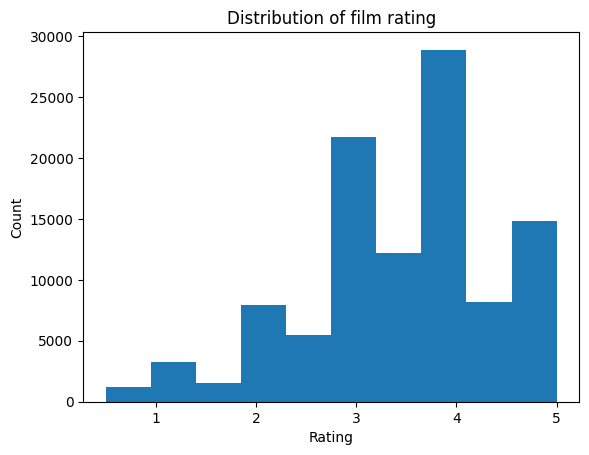

In [13]:
# Distribution of film rating
plt.hist(rating_data['rating'], bins=10)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of film rating')
plt.show()

In [14]:
# The most popular film genres
popular_genres = genre_counts.head(5)
print("The most popular film genres:")
print(popular_genres)

The most popular film genres:
Drama       5220
Comedy      3515
Thriller    2187
Romance     1788
Action      1737
dtype: int64


In [15]:
# Film with the highest rating
top_rated_movies = rating_data.groupby('movieId')['rating'].mean().nlargest(5)
top_rated_movies = top_rated_movies.reset_index()
top_rated_movies = pd.merge(top_rated_movies, movie_data[['movieId', 'title']], on='movieId', how='left')
print("Film with the highest rating:")
print(top_rated_movies[['title', 'rating']])

Film with the highest rating:
                                            title  rating
0  Star Maker, The (Uomo delle stelle, L') (1995)     5.0
1                                Dream Man (1995)     5.0
2                              Being Human (1993)     5.0
3                           Heaven & Earth (1993)     5.0
4                                     Kika (1993)     5.0


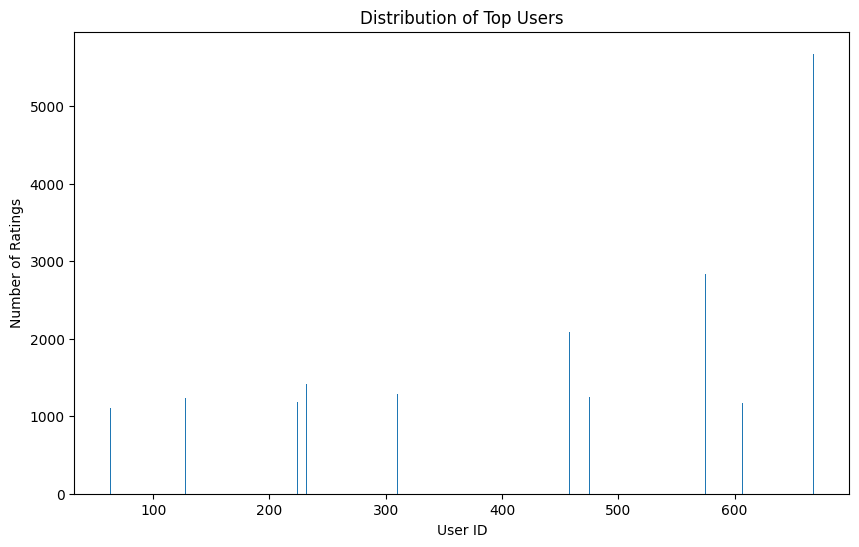

In [16]:
# Here to calculate top users
# Count the number of ratings given by each user
user_rating_counts = rating_data['userId'].value_counts()

# Take the top 10 users based on the number of ratings given
top_users = user_rating_counts.head(10)

# Visualize it
plt.figure(figsize=(10, 6))
plt.bar(top_users.index, top_users.values)
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
plt.title('Distribution of Top Users')
plt.show()

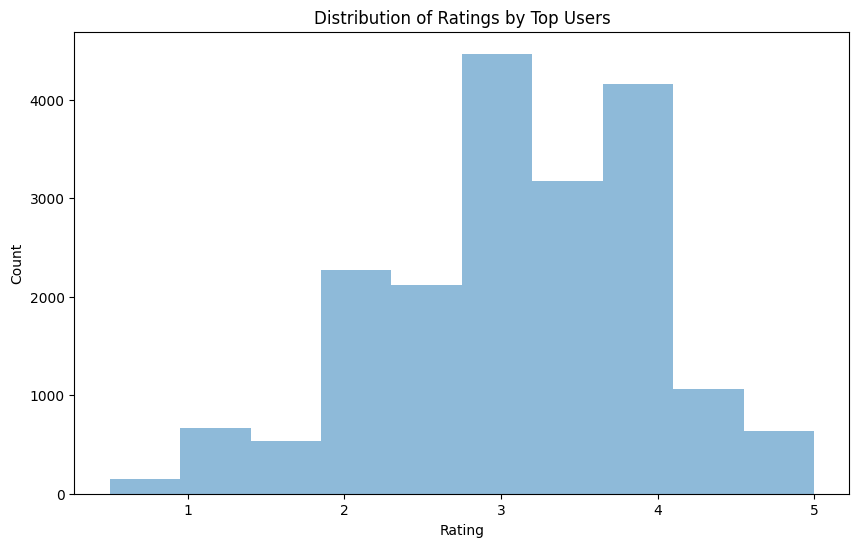

In [17]:
# Filter rating data based on top users
top_users_ratings = rating_data[rating_data['userId'].isin(top_users.index)]

# Visualize the distribution of ratings given by top users
plt.figure(figsize=(10, 6))
plt.hist(top_users_ratings['rating'], bins=10, alpha=0.5)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings by Top Users')
plt.show()

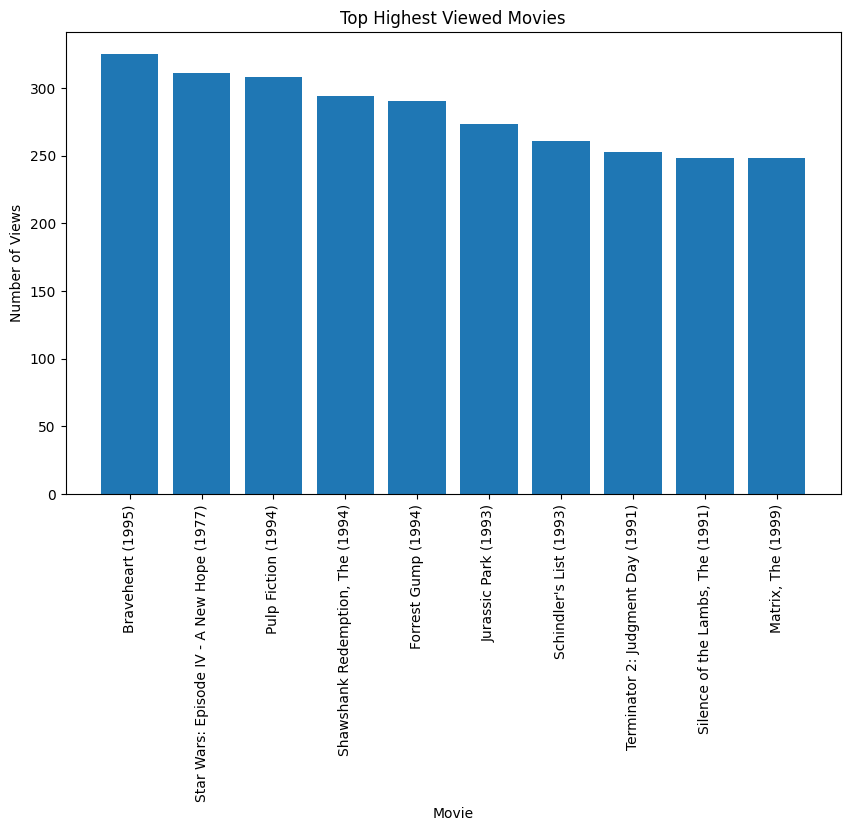

In [18]:
# Calculate the total views of the highest films
top_movies = rating_data['movieId'].value_counts().head(10)
top_movies_data = movie_data[movie_data['movieId'].isin(top_movies.index)]

# Visualize the highest total views of movies
plt.figure(figsize=(10, 6))
plt.bar(top_movies_data['title'], top_movies.values)
plt.xticks(rotation=90)
plt.xlabel('Movie')
plt.ylabel('Number of Views')
plt.title('Top Highest Viewed Movies')
plt.show()

#### **Application of collaborative filtering models**

**Why**: Collaborative filtering is one of the most popular and effective methods for film recommendations. In this case, you can use the "ratings" data to build a model that analyzes user preference patterns for movies. This method will recommend movies that are liked by users with similar preferences.

**Function**: The collaborative filtering algorithm will look for similarities between users based on their preferences for the same film. By comparing the preferences of similar users, the algorithm can recommend films that are liked by other users with similar preferences.

**Purpose**: The purpose of the collaborative filtering method is to provide film recommendations that are relevant and tailored to user preferences based on patterns of relationship and similarities with other users. 

a. First thing we need to separate data into training data (training data) and test data (test data):

This is necessary to separate the data that will be used to train the model and the data that will be used to test the model's performance.

In [19]:
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(rating_data[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.2)

b. Create a user-item matrix (user-item matrix) based on rating data:

to get the user-item matrix representation of the rating data to be used in the collaborative filtering model. This matrix will be input in training the model and making predictions.

In [20]:
trainset_matrix = data.build_full_trainset().ur

d. Choose the appropriate collaborative algorithm

The KNNBasic algorithm was chosen with the cosine similarity method and user-based collaborative filtering.

In [21]:
# Pilih algoritma collaborative filtering yang sesuai (KNNBasic)
model = KNNBasic(k=50, sim_options={'name': 'cosine', 'user_based': True})

d. Train the collaborative filtering model using the training data:

In this step, the collaborative filtering model is obtained by training the KNNBasic algorithm using training data.

In [22]:
# Train data using train data
model.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


The **<surprise.prediction_algorithms.knns.KNNBasic at 0x7f86dee71f90>** information indicates which model object was created. In this case, the model object is an instance of the **KNNBasic** class from the surprise library with memory address **0x7f86dee71f90.**

e. Predict the rating for users and movies that are not in the training data:

After the model is trained, we can make rating predictions for users and films that are not in the training data.

In [24]:
# Conduct rating predictions for users and movies that are not in the training data
predictions = model.test(testset)

f. Evaluate model performance using the MSE (Mean Squared Error) or RMSE (Root Mean Squared Error) metrics:

The MSE and RMSE metrics are used to measure the model's prediction error. The lower the MSE or RMSE value, the better the model's performance in predicting ratings.

In [25]:
# Evaluate model performance using the MSE (Mean Squared Error) metric
mse = accuracy.mse(predictions)
print("Mean Squared Error (MSE):", mse)

# Evaluate model performance using the RMSE (Root Mean Squared Error) metric
rmse = accuracy.rmse(predictions)
print("Root Mean Squared Error (RMSE):", rmse)

MSE: 0.9729
Mean Squared Error (MSE): 0.9728735923124003
RMSE: 0.9863
Root Mean Squared Error (RMSE): 0.9863435467991871


The MSE value of 0.9729 indicates that the average squared difference between the predicted value and the actual value is around 0.97291. The closer to zero, the better. Likewise, the RMSE value of 0.9863 shows that the average difference between the predicted value and the actual value is around 0.9863. The closer to zero, the better.

However, to evaluate more comprehensively, it is advisable to compare these results with other evaluation metrics and perform comparisons with other models or other approaches that may be used.

There are several evaluation metrics that are commonly used in collaborative filtering, namely Precision, Recall, and F1-Score. These metrics are useful for measuring the model's performance in making recommendations.

In [26]:
# We conduct this process by load 'scikit-learn' library first
from sklearn.metrics import precision_score, recall_score, f1_score

# Get the predicted value and the actual value
predicted_ratings = [pred.est for pred in predictions]
actual_ratings = [pred.r_ui for pred in predictions]

In [27]:
# Converts the predicted value to binary (eg 1 if rating >= threshold, 0 if rating < threshold)
threshold = 3.5
binary_predicted_ratings = [1 if rating >= threshold else 0 for rating in predicted_ratings]
binary_actual_ratings = [1 if rating >= threshold else 0 for rating in actual_ratings]

The following is a brief description of the evaluation metrics used to compare:

**a. Precision:** This metric measures how accurately the model provides relevant recommendations. Precision is expressed as the ratio between the number of relevant recommendations and the total number of recommendations given.

**b. Recall:** This metric measures how well the model can find all relevant items. Recall is expressed as the ratio between the number of relevant recommendations and the total number of items that are actually relevant.

**c. F1-Score:** This metric is the harmonic mean of Precision and Recall. The F1-Score provides a composite score that includes both metrics, and is useful for giving an overall picture of a model's performance.

In [28]:
# Menghitung Precision, Recall, dan F1-Score
precision = precision_score(binary_actual_ratings, binary_predicted_ratings)
recall = recall_score(binary_actual_ratings, binary_predicted_ratings)
f1 = f1_score(binary_actual_ratings, binary_predicted_ratings)

# Menampilkan hasil
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.7105067064083458
Recall: 0.7434118197411508
F1-Score: 0.7265869084812924


**Precision:** The Precision value of 0.7105 indicates that around 71.05% of the recommendations given by the model are relevant recommendations. Precision measures the accuracy of the recommendations given.

**Recall:** The Recall value of 0.7434 indicates that the model managed to find around 74.34% of all items that were actually relevant. Recall measures the success of the model in finding relevant items.

**F1-Score:** The F1-Score value of 0.7265 is the harmonic mean of Precision and Recall. The F1-Score gives an overall picture of the model's performance taking these two metrics into account.

With that said, Precision and Recall have relatively high values, indicating that the model provides fairly accurate recommendations and manages to find relevant items.
F1-Score also has a relatively high value, indicating that the model has a good balance between Precision and Recall.

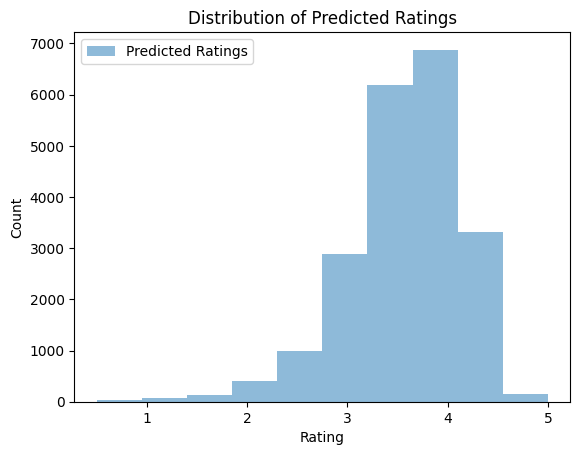

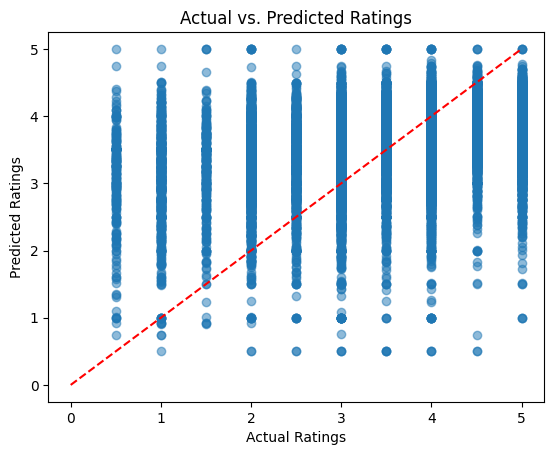

In [29]:
# Here to see the distribution of predicted results, as well as visualize the distribution of
# predicted results and the actual value to see
# how far the model can accurately predict ratings within a certain range

# Retrieves the actual rating value and the predicted result
actual_ratings = [r[2] for r in testset]
predicted_ratings = [pred.est for pred in predictions]

# Visualize the distribution of predicted results
plt.hist(predicted_ratings, bins=10, alpha=0.5, label='Predicted Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Predicted Ratings')
plt.legend()
plt.show()

# Visualize the comparison between the predicted result and the true value
plt.scatter(actual_ratings, predicted_ratings, alpha=0.5)
plt.plot([0, 5], [0, 5], linestyle='--', color='r')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs. Predicted Ratings')
plt.show()

In [33]:
#predictions = model.test(testset)
# Displays 5 movie recommendations for users with ID 1
user_id = 1
top_n = 5
user_predictions = model.get_neighbors(user_id, k=top_n)
recommended_movies = movie_data[movie_data['movieId'].isin(user_predictions)]
print("Movie Recommendations for Users with ID", user_id)
print(recommended_movies[['movieId', 'title', 'genres']])

Movie Recommendations for Users with ID 1
     movieId                          title                  genres
84        92             Mary Reilly (1996)   Drama|Horror|Thriller
111      125  Flirting With Disaster (1996)                  Comedy
139      163               Desperado (1995)  Action|Romance|Western


#### **Conclusion**

The Collaborative Filtering model that has been applied has a relatively low error rate in predicting film ratings. With relatively small MSE and RMSE, it can be said that the model is quite accurate in providing rating predictions that are close to the true value.

Overall, based on the evaluation that has been done, the collaborative filtering model that you apply has a pretty good performance. Low MSE and RMSE values indicate that the model can predict ratings well, while high Precision, Recall, and F1-Score values indicate that the model provides accurate recommendations and succeeds in finding relevant items.

However, keep in mind that a more accurate and comprehensive comparison requires more in-depth analysis taking into account other evaluation metrics and conducting a wider range of tests of conditions and data.